# t-test?
- 검정통계량이 귀무가설 하에서 t-분포를 따르는 통계적 가설 검정 방법
- 어느 특정 집단의 평균 값을 추정하거나 차이를 검정할 때 사용
- 종속 변수는 연속형, 독립 변수는 범주형이여야 한다 

-----------------

## 일표본 T-검정(One Sample t-test)
- 단일모집단에서 관심이 있는 연속형 변수의 평균값을 특정 값과 비교
- 가정 : 모집단의 구성요소들이 정규분포를 이룬다는 가정
- 종속변수는 연속형이어야하고 검증 기준 값이 있어야 한다.

#### 분석 단계
- 정규성 검정 만족 시 stats.ttest_rel을 이용해서 t-검정 진행
- 정규성 검정 불만족 시 stats.Wilcoxon을 이용해서 t-검정 진행

#### 가설수립
- 귀무가설 : 모평균의 값은 **이다
- 대립가설 : 모평균의 값은 **이 아니다

#### shapiro test 함수
- 귀무가설 : 정규성을 갖는다
- 대립가설 : 정규성을 갖지 않는다

In [2]:
import pandas as pd

cats = pd.read_csv("./data/cats.csv")
cats

,Sex,Bwt,Hwt
0,F,2.0,7.0
1,F,2.0,7.4
2,F,2.0,9.5
3,F,2.1,7.2
4,F,2.1,7.3
...,...,...,...
139,M,3.7,11.0
140,M,3.8,14.8
141,M,3.8,16.8
142,M,3.9,14.4


In [3]:
cats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     144 non-null    object 
 1   Bwt     144 non-null    float64
 2   Hwt     144 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.5+ KB


In [4]:
import scipy.stats as stats
from scipy.stats import shapiro

mu = 2.6

shapiro(cats['Bwt'])

ShapiroResult(statistic=0.9518786668777466, pvalue=6.730248423991725e-05)

- ShapiroResult의 첫 번째 값은 검정통계치, 두 번째 값은 p-value
- p-value가 유의수준 0.05보다 작으므로 데이터가 정규분포를 따른다는 귀무가설을 기각한다.
- 만약 t-test를 진행하기에 앞서 데이터가 정규분포를 따르지 않는다면 wilcoxon test로 t-test를 진행한다.
- 데이터가 정규분포를 따른다면 ttest_1samp를 사용한다

In [6]:
stats.wilcoxon(cats.Bwt - mu, alternative='two-sided')

WilcoxonResult(statistic=3573.0, pvalue=0.02524520294814093)

- 분석결과 p-value의 값의 유의수준 0.05보다 낮으므로 cats['Bwt']의 평균은 mu와 다르다는 대립가설을 채택한다

Text(0, 0.5, 'Count')

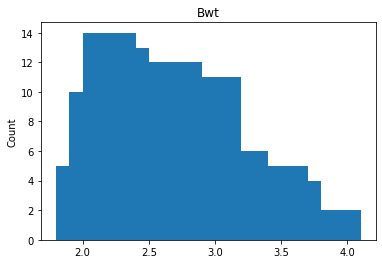

In [7]:
import matplotlib.pyplot as plt
cats_bwt_cnt = pd.value_counts(cats['Bwt'].values, sort=False)
width = 0.4

plt.bar(cats_bwt_cnt.index, cats_bwt_cnt.values, width)
plt.title("Bwt")
plt.ylabel("Count")

- 시각화한 고양이의 몸무게 그래프를 보면 데이터가 정규성을 띄지 않음을 확인할 수 있다.

----------------------

## 대응표본 T-검정(Paired Sample t-test)
- 단일모집단에 대해 어떤 처리를 가했을 때, 처리 전후에 따른 평균 차이를 비교한다.
- 표본 내 개체들에 대해 두 번의 측정 실행(같은 집단이기 때문에 등분산성을 만족한다)
- 모집단의 관측값이 정규성을 만족해야 한다.

#### 분석 단계
- 정규성 검정 만족 시 stats.ttest_rel을 이용해서 t-검정 진행
- 정규성 검정 불만족 시 stats.Wilcoxon을 이용해서 t-검정 진행

#### 가설수립
- 귀무가설 : 두 모평균 사이의 차이는 없다
- 대립가설 : 두 모평균 사이의 차이는 있다.

#### shapiro test 함수
- 귀무가설 : 정규성을 갖는다
- 대립가설 : 정규성을 갖지 않는다

In [8]:
# 아래의 데이터는 수면영양제 복용 전 후 환자의 수면시간에 대한 데이터라고 가정
import pandas as pd 
data = {'before':[7,3,4,5,2,1,6,6,5,4],
       'after':[8,4,5,6,2,3,6,8,6,5]}
data = pd.DataFrame(data)
data

,before,after
0,7,8
1,3,4
2,4,5
3,5,6
4,2,2
5,1,3
6,6,6
7,6,8
8,5,6
9,4,5


In [10]:
shapiro(data['before'])
shapiro(data['after'])

ShapiroResult(statistic=0.9456837177276611, pvalue=0.6177994012832642)

- shapiro 검정 결과 위의 데이터는 정규성을 만족하고 있다.

#### 대응표본 t-test (stats.ttest_rel을 사용)
- 귀무가설 : 수면영양제 복용 전 후의 수면시간 차이는 없다.
- 대립가설 : 수면영양제 복용 전 후의 수면시간 차이는 있다.

In [11]:
stats.ttest_rel(data['after'], data['before'], alternative='greater')

Ttest_relResult(statistic=4.743416490252569, pvalue=0.0005269356285082765)

In [12]:
data.mean()

before    4.3
after     5.3
dtype: float64

- p-value의 값이 유의수준보다 작으므로 수면영양제 복용 전 후의 수면시간의 차이는 있다.
- 평균값 비교 결과 복용 후 수면시간이 증가했다는 결론을 내릴 수 있다.

-----------------

## 독립표본 t-test(Independent Sample t-test)
- 두 개의 독립된 모집단의 평균을 비교할 때 사용
- 모집단, 모수, 표본이 각 두 개씩 존재(동일 모집단이 아니기 때문에 등분산성 가정이 필요하다)
- 두 모집단은 정규성을 만족해야 하며 두 모집단의 분산이 서로 같아야 한다.

#### 분석 단계
- 정규성 검정 불만족 시 stats.Wilcoxon을 이용해서 t-검정 진행
- 정규성 검정 만족 시 등분산 검정을 진행한다
- 등분산 검정 불만족 시 stats.ttest_ind에서 equal_var=False로 파라미터 설정 후 진행
- 등분산 검정 만족 시 stats.ttest_ind에서 equal_var=True로 파라미터 설정 후 진행

#### 가설수립
- 귀무가설 : 두 모평균 사이의 차이는 없다
- 대립가설 : 두 모평균 사이의 차이는 있다.

#### levene 함수
- 귀무가설 : 등분산성을 갖는다
- 대립가설 : 등분산성을 갖지 않는다

In [16]:
# 아래의 데이터는 정규성을 따른다는 가정 하에 수컷과 암컷 고양이의 몸무게 차이를 비교한다
# 등분선
cats = pd.read_csv("./data/cats.csv")

female = cats.loc[cats.Sex == 'F', 'Bwt']
male = cats.loc[cats.Sex == 'M', 'Bwt']
stats.levene(female, male)

LeveneResult(statistic=19.43101190877999, pvalue=2.0435285255189404e-05)

- levene 분석결과 위의 데이터는 등분산성을 만족하지 않는다
- 따라서 ttest_ind에 equal_var=False 설정 후 독립 t-test 진행

In [17]:
stats.ttest_ind(female, male, equal_var=False)

Ttest_indResult(statistic=-8.70948849909559, pvalue=8.831034455859356e-15)

In [18]:
print(female.mean(), male.mean())

2.359574468085107 2.8999999999999995


- 독립 t-test 결과 p-value가 유의수준 0.05보다 작으므로 귀무가설을 기각한다.
- 즉 수컷과 암컷 고양이의 몸무게 차이는 존재하며 수컷 고양이의 몸무게가 더 크다는 결론을 내릴 수 있다.

Text(0, 0.5, 'Count')

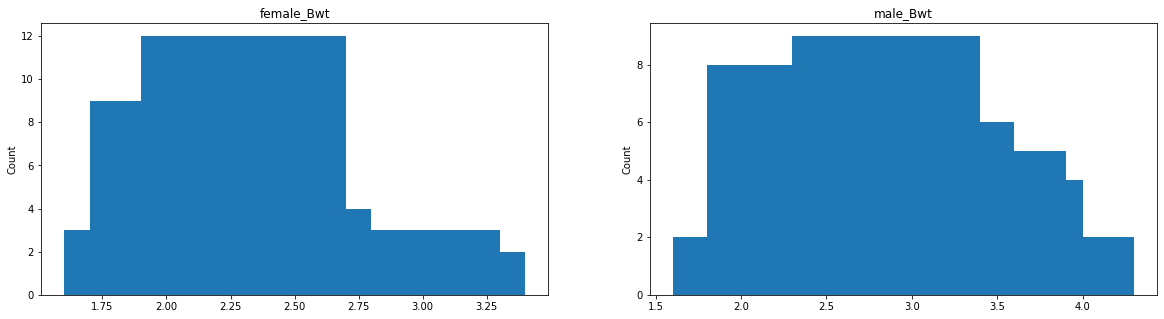

In [19]:
female_bwt_cnt = pd.value_counts(female.values, sort=False)
male_bwt_cnt = pd.value_counts(male.values, sort=False)
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

width = 0.4

axs[0].bar(female_bwt_cnt.index, female_bwt_cnt.values)
axs[0].set_title('female_Bwt')
axs[0].set_ylabel('Count')
axs[1].bar(male_bwt_cnt.index, male_bwt_cnt.values)
axs[1].set_title('male_Bwt')
axs[1].set_ylabel('Count')